In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
autoDF =pd.read_csv("auto_mpg.csv",encoding="ISO-8859-1")
autoDF.shape
autoDF.columns
autoDF1=autoDF[['mpg','cylinder','displacement','horsepower','weight','acceleration','year']]
autoDF2 = autoDF1.apply(pd.to_numeric, errors='coerce')
auto=autoDF2.dropna()
auto=auto[['horsepower','mpg']].sort_values('horsepower')
X=auto[['horsepower']]
y=auto['mpg']


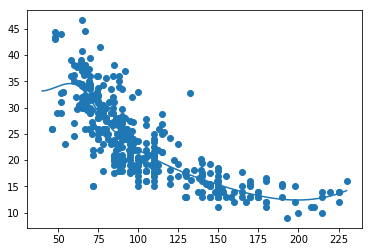

In [90]:
from scipy.interpolate import LSQUnivariateSpline
knots=[65,75,100,150]
X=np.array(auto['horsepower'])
y=np.array(auto['mpg'])
s = LSQUnivariateSpline(X,y,knots)
xs = linspace(40,230,1000)
ys = s(xs)
plt.scatter(X, y)
plt.plot(xs, ys)
plt.show()

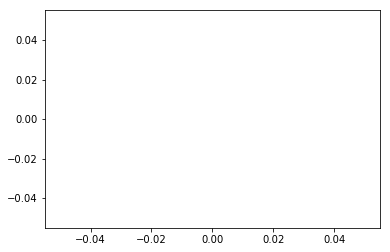

array([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  n

In [107]:
from scipy.interpolate import UnivariateSpline

X=np.array(auto['horsepower'])
y=np.array(auto['mpg'])
y1 = y.copy()
w = np.isnan(y1)
y1[w] = 0
s = UnivariateSpline(X, y1,k=2,s=0)

#plt.scatter(X, y)
plt.plot(X, s(X))
plt.show()
s(X)

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.87
Accuracy: 0.87
Precision: 0.96
Recall: 0.83
F1: 0.89


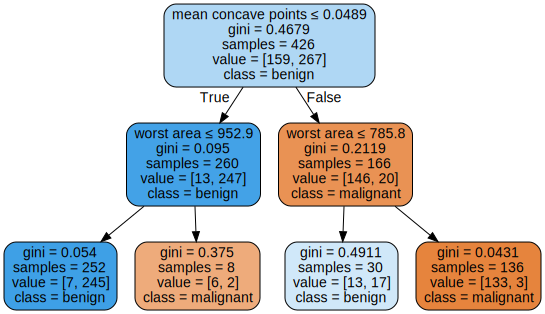

In [322]:
#SVM
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification, make_blobs
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import tree
import graphviz 
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer,
                                                   random_state = 0)
clf = DecisionTreeClassifier().fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

y_predicted=clf.predict(X_test)
confusion = confusion_matrix(y_test, y_predicted)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_predicted)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_predicted)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_predicted)))
print('F1: {:.2f}'.format(f1_score(y_test, y_predicted)))

clf = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=cancer.feature_names,  
                         class_names=cancer.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

ValueError: arrays must all be same length

In [122]:
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score

depth=np.arange(1,12)
for i in depth:
    clf = DecisionTreeClassifier(max_depth = i).fit(X_cancer, y_cancer)
    print('Mean cross-validation (accuracy)', np.mean(cross_val_score(clf, X_cancer, y_cancer, cv=10)))

('Mean cross-validation (accuracy)', 0.8929662518364877)
('Mean cross-validation (accuracy)', 0.92116390113214064)
('Mean cross-validation (accuracy)', 0.90872547748682053)
('Mean cross-validation (accuracy)', 0.91747040013827674)
('Mean cross-validation (accuracy)', 0.91414527698556736)
('Mean cross-validation (accuracy)', 0.91063650505574267)
('Mean cross-validation (accuracy)', 0.91408478091781176)
('Mean cross-validation (accuracy)', 0.91759247256071208)
('Mean cross-validation (accuracy)', 0.90875896638147091)
('Mean cross-validation (accuracy)', 0.91408478091781176)
('Mean cross-validation (accuracy)', 0.90882054273615065)


In [144]:
X=pd.DataFrame(X_cancer)
y=pd.DataFrame(y_cancer)
y.shape
accuracy=[]
foldAcc=[]
depth=5
nK=len(X)/float(folds)
nK
kf = KFold(len(X),n_folds=folds)
for train_index, test_index in kf:
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]  
            clf = DecisionTreeClassifier(max_depth = i).fit(X_train, y_train)
            score=clf.score(X_test, y_test)
            accuracy.append(score)  

foldAcc.append(np.mean(accuracy))
print(foldAcc)

[0.89812124495223089]


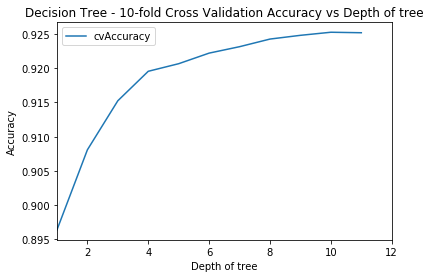

In [164]:
# For degreee 
from sklearn.cross_validation import train_test_split, KFold
def computeCVAccuracy(X,y,folds):
    accuracy=[]
    foldAcc=[]
    depth=[1,2,3,4,5,6,7,8,9,10,11,12]
    nK=len(X)/float(folds)
    xval_err=0
    for i in depth: 
        kf = KFold(len(X),n_folds=folds)
        for train_index, test_index in kf:
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]  
            clf = DecisionTreeClassifier(max_depth = i).fit(X_train, y_train)
            score=clf.score(X_test, y_test)
            accuracy.append(score)     
            
        foldAcc.append(np.mean(accuracy))  
        
    return(foldAcc)
cvAccuracy=computeCVAccuracy(pd.DataFrame(X_cancer),pd.DataFrame(y_cancer),folds=10)

df1=pd.DataFrame(cvAccuracy)
df1.columns=['cvAccuracy']
df=df1.reindex([1,2,3,4,5,6,7,8,9,10,11,12])
df.plot()
fig1=plt.title("Decision Tree - 10-fold Cross Validation Accuracy vs Depth of tree")
fig1=plt.xlabel("Depth of tree")
fig1=plt.ylabel("Accuracy")
fig1.figure.savefig('foo1.png', bbox_inches='tight')
plt.show()


C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


R-squared score (training): 0.917
R-squared score (test): 0.734
[ 0.03437382  0.          0.00580335  0.          0.00731004  0.36461548
  0.00638577  0.03432173  0.0041244   0.01732328  0.01074148  0.0012638
  0.51373683]


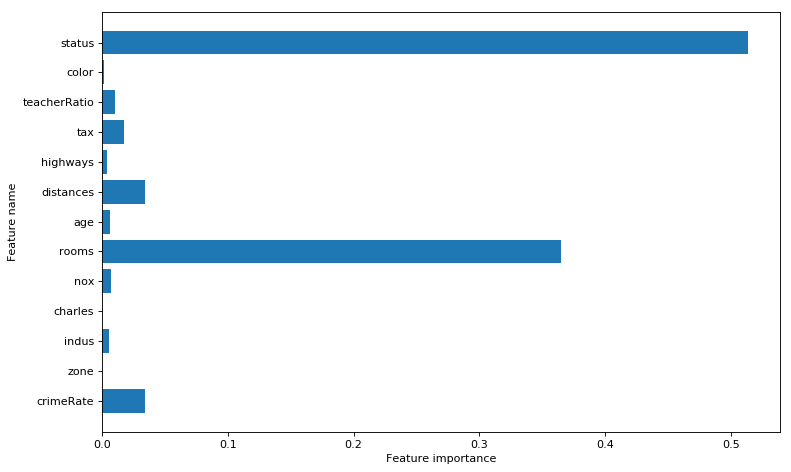

In [13]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
df = pd.read_csv("Boston.csv",encoding = "ISO-8859-1")

X=df[['crimeRate','zone', 'indus','charles','nox','rooms', 'age','distances','highways','tax',
       'teacherRatio','color','status']]
y=df['medianValue']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

regr = RandomForestRegressor(max_depth=4,oob_score=True, random_state=0)
regr.fit(X_train, y_train)
oobPred=regr.oob_prediction_ 
mse=np.mean(np.square(oobPred-y_train))

print('R-squared score (training): {:.3f}'
     .format(regr.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(regr.score(X_test, y_test)))

feature_names=['crimeRate','zone', 'indus','charles','nox','rooms', 'age','distances','highways','tax',
       'teacherRatio','color','status']
print(regr.feature_importances_)
plt.figure(figsize=(10,6),dpi=80)
c_features=X_train.shape[1]
plt.barh(np.arange(c_features),regr.feature_importances_)
plt.xlabel("Feature importance")
plt.ylabel("Feature name")

plt.yticks(np.arange(c_features), feature_names)
plt.tight_layout()

plt.show()



In [19]:
os.getcwd()

'C:\\Users\\IBM_ADMIN\\RPython-Part5\\RPython-Part5-master'

In [15]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
df = pd.read_csv("Boston.csv",encoding = "ISO-8859-1")

X=df[['crimeRate','zone', 'indus','charles','nox','rooms', 'age','distances','highways','tax',
       'teacherRatio','color','status']]
y=df['medianValue']

cvError=[]
oobError=[]
oobMSE=[]
for i in range(1,13):
    regr = RandomForestRegressor(max_depth=4, n_estimators=400,max_features=i,oob_score=True,random_state=0)
    mse= np.mean(cross_val_score(regr, X, y, cv=5,scoring = 'neg_mean_squared_error'))
    # Since this is neg_mean_squared_error I have inverted the sign to get MSE
    cvError.append(-mse)
    # Fit on all data to compute OOB error
    regr.fit(X, y)
    # Record the OOB error for each `max_features=i` setting
    oob = 1 - regr.oob_score_
    oobError.append(oob)
    # Get the  Out of Prediction
    oobPred=regr.oob_prediction_ 
    # Compute the Mean Squared Error between OOB Prediction and target
    mseOOB=np.mean(np.square(oobPred-y))
    oobMSE.append(mseOOB)

    


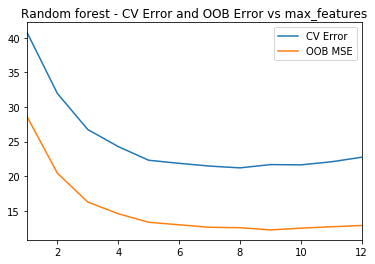

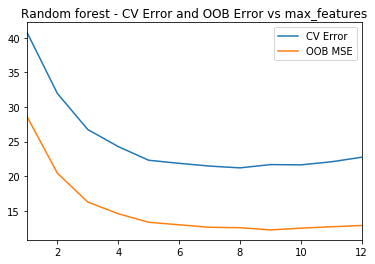

In [18]:
# Set max_features
maxFeatures=np.arange(1,13)   
cvError=pd.DataFrame(cvError,index=maxFeatures)
oobMSE=pd.DataFrame(oobMSE,index=maxFeatures)
#Create a dataframe
df=pd.concat([cvError,oobMSE],axis=1)
df.columns=['CV Error','OOB MSE']

fig8=df.plot()
fig8=plt.title('Random forest - CV Error and OOB Error vs max_features')
fig8.figure.savefig('fig8.png', bbox_inches='tight')
plt.show()

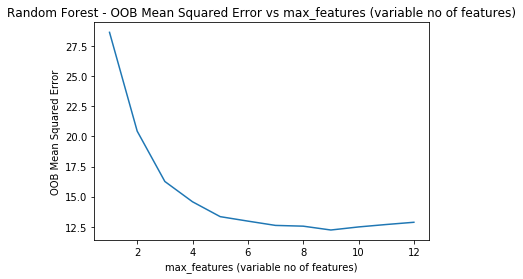

In [16]:
plt.plot(range(1,13),oobMSE)
fig2=plt.title("Random Forest - OOB Mean Squared Error vs max_features (variable no of features)")
fig2=plt.xlabel("max_features (variable no of features)")
fig2=plt.ylabel("OOB Mean Squared Error")
fig2.figure.savefig('fig8.png', bbox_inches='tight')
plt.show()

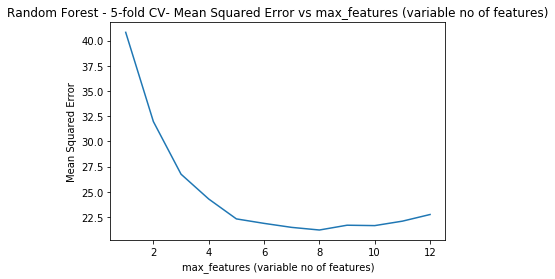

In [325]:
plt.plot(range(1,13),cvError)
fig2=plt.title("Random Forest - 5-fold CV- Mean Squared Error vs max_features (variable no of features)")
fig2=plt.xlabel("max_features (variable no of features)")
fig2=plt.ylabel("Mean Squared Error")
fig2.figure.savefig('foo2.png', bbox_inches='tight')
plt.show()


In [225]:
from sklearn.ensemble import GradientBoostingRegressor
df = pd.read_csv("Boston.csv",encoding = "ISO-8859-1")

X=df[['crimeRate','zone', 'indus','charles','nox','rooms', 'age','distances','highways','tax',
       'teacherRatio','color','status']]
y=df['medianValue']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

regr = GradientBoostingRegressor()
regr.fit(X_train, y_train)

print('R-squared score (training): {:.3f}'
     .format(regr.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(regr.score(X_test, y_test)))

R-squared score (training): 0.983
R-squared score (test): 0.817


In [242]:
from sklearn.ensemble import GradientBoostingRegressor
df = pd.read_csv("Boston.csv",encoding = "ISO-8859-1")

X=df[['crimeRate','zone', 'indus','charles','nox','rooms', 'age','distances','highways','tax',
       'teacherRatio','color','status']]
y=df['medianValue']

cvError=[]
learning_rate =[.001,0.01,0.03,0.05,0.07,0.09,0.1]
#learning_rate =[.001,0.09,0.07,0.05,0.03,0.01,0.1]
for lr in learning_rate:
    regr = GradientBoostingRegressor(max_depth=4, n_estimators=400,learning_rate =lr,random_state=0)
    mse= np.mean(cross_val_score(regr, X, y, cv=10,scoring = 'neg_mean_squared_error'))
    # Since this is neg_mean_squared_error I have inverted the sign to get MSE
    cvError.append(-mse)

In [226]:
learning_rate =[.001,0.09,0.07,0.05,0.03,0.01,0.1]
for lr in learning_rate:
    print(lr)

0.001
0.09
0.07
0.05
0.03
0.01
0.1


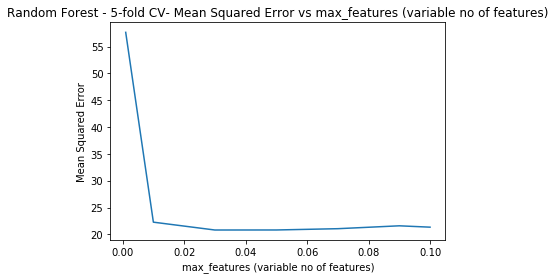

In [243]:
learning_rate =[.001,0.01,0.03,0.05,0.07,0.09,0.1]
plt.plot(learning_rate,cvError)
fig2=plt.title("Random Forest - 5-fold CV- Mean Squared Error vs max_features (variable no of features)")
fig2=plt.xlabel("max_features (variable no of features)")
fig2=plt.ylabel("Mean Squared Error")
fig2.figure.savefig('foo2.png', bbox_inches='tight')
plt.show()


In [237]:
a=pd.concat([pd.DataFrame(learning_rate),pd.DataFrame(cvError)],axis=1)
a.columns

,0,0
0,0.001,59.148464
1,0.090,21.544293
2,0.070,22.411327
3,0.050,21.904282
4,0.030,21.620151
5,0.010,22.636409
6,0.100,21.033408


In [307]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
autoDF =pd.read_csv("auto_mpg.csv",encoding="ISO-8859-1")
autoDF.shape
autoDF.columns
autoDF1=autoDF[['mpg','cylinder','displacement','horsepower','weight','acceleration','year']]
autoDF2 = autoDF1.apply(pd.to_numeric, errors='coerce')
autoDF3=autoDF2.dropna()
autoDF3.shape
X=autoDF3[['horsepower']]
y=autoDF3['mpg']
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)
linreg = LinearRegression().fit(X_poly, y)




(poly deg 2) R-squared score (training): 0.689


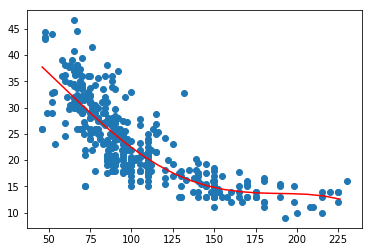

In [310]:
hpGrid = np.arange(np.min(X),np.max(X),10)
hpGrid
hp=hpGrid.reshape(-1,1)
poly = PolynomialFeatures(degree=4)
hp_poly = poly.fit_transform(hp)
plt.scatter(X,y)

ypred=linreg.predict(hp_poly)
plt.plot(hp,ypred,c="red")
plt.show()

In [290]:
X_test.shape

(98L, 5L)

In [294]:
hp_poly.shape

(19L, 5L)

In [316]:
?DecisionTreeClassifier